In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Processing Data

In [5]:
def transformY(Y):
    Z = np.zeros((len(Y),10))
    for i in range(len(Y)):
        Z[i][Y[i]] = 1
    return Z

In [6]:
y_train = transformY(y_train)
y_test = transformY(y_test)

In [7]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)


In [8]:
x_train = x_train/255
x_test = x_test/255

# Train model

In [22]:
augmentation = keras.Sequential([
        keras.layers.experimental.preprocessing.RandomZoom(0.1),
        keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
def show_img(img):
  plt.imshow(img.reshape((28,28)))

In [24]:
new_imgs = augmentation(x_train)

In [26]:
(new_imgs.numpy().shape)

(60000, 28, 28, 1)

In [27]:
import matplotlib.pyplot as plt

In [28]:
x_train_aug = np.concatenate((x_train, new_imgs))
y_train_aug = np.concatenate((y_train, y_train))

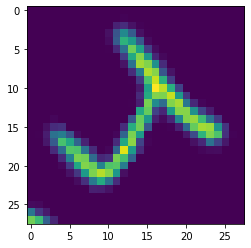

In [33]:
show_img(x_train_aug[60002])

In [32]:
y_train_aug[60000]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

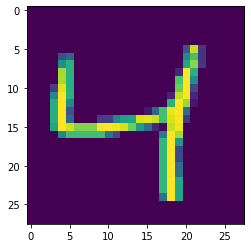

In [34]:
show_img(x_train_aug[2])

In [36]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Conv2D(96, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.20))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train_aug, y_train_aug, epochs=10, verbose=1)

Epoch 1/10
3750/3750 [==============================] - 44s 3ms/step - loss: 0.0331 - accuracy: 0.9474
Epoch 2/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0123 - accuracy: 0.9821
Epoch 3/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0088 - accuracy: 0.9876
Epoch 4/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0068 - accuracy: 0.9908
Epoch 5/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0056 - accuracy: 0.9924
Epoch 6/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0047 - accuracy: 0.9937
Epoch 7/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0041 - accuracy: 0.9949
Epoch 8/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0035 - accuracy: 0.9956
Epoch 9/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0030 - accuracy: 0.9962
Epoch 10/10
3750/3750 [==============================] - 13s 3ms/step - l

In [38]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0057 - accuracy: 0.9935


[0.005720630753785372, 0.9934999942779541]

In [39]:
json_f = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(json_f)
model.save_weights('model.h5')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
vis = x_train.reshape((60000,28,28))

In [ ]:
x_train.shape

(60000, 28, 28, 1)

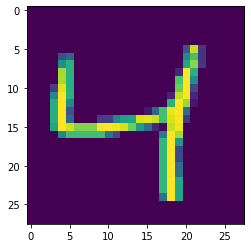

In [ ]:
plt.imshow(vis[2])